In [4]:
using Plots, Plots.PlotMeasures
using Random, Distributions
using JLD2

# Noisy Sine Wave with variable trend, noise and period

In [417]:
function generate_noisy_sine(T::Int, noise_ampltiude::Union{Nothing, Float64}, 
    trend::Union{Nothing, Float64}, freq::Union{Nothing, Float64})
    
    phase = rand(Uniform(0, 2π))
    noise_amp_val = isnothing(noise_ampltiude) ? rand(Uniform(0.1, 1.0)) : noise_ampltiude
    trend_val = isnothing(trend) ? rand(Uniform(-0.8, 0.8)) : trend
    freq_val = isnothing(freq) ? rand(Uniform(10, 20)) : freq 
    x = collect(range(0, freq_val*pi, T))
    signal = 3 * sin.(2 * x .+ phase)
    noise = rand(Normal(0, noise_amp_val), 100)
    add_trend = trend_val .* x
    noisy_signal_trend = signal .+ noise .+ add_trend

    return noisy_signal_trend, phase, noise_amp_val, trend_val, freq_val
end;

Plot some test examples with the following distributions:
- $\eta \sim U(0.1, 1.0)$
- $m \sim U(-0.8, 0.8)$
- $f \sim U(10, 20)$

# Case 1: Fixed trend, varying eta, and varying freq

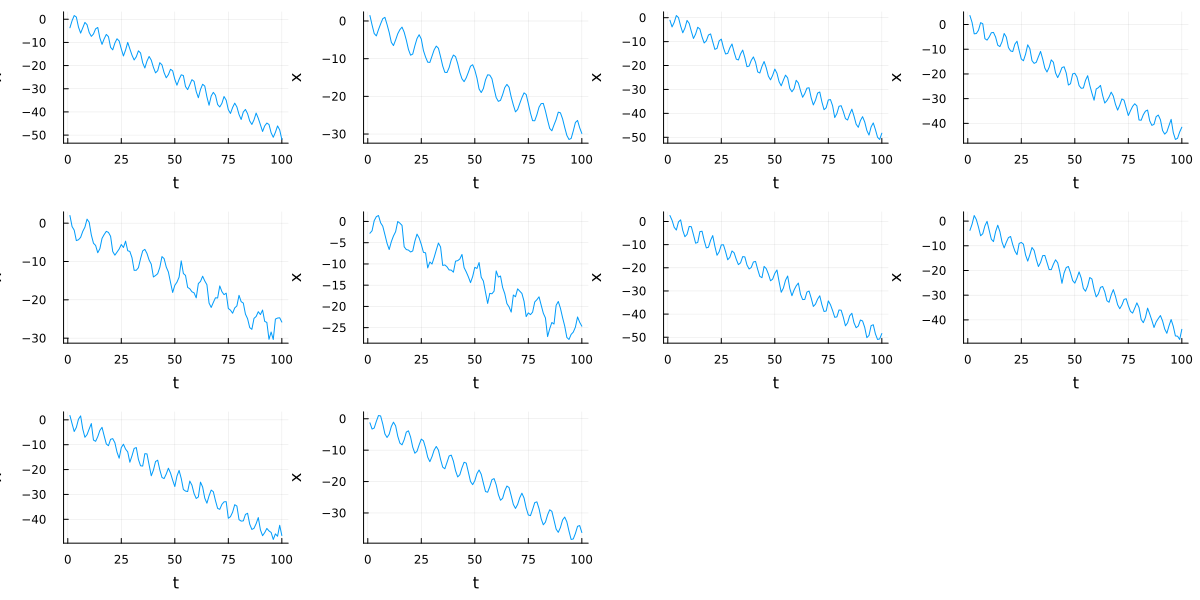

In [418]:
trend = -0.8
samples = 10
ps = []
for i in 1:samples
    noisy_signal_trend, _, _, _, _ = generate_noisy_sine(100, nothing, trend, nothing)
    p = plot(noisy_signal_trend, xlabel="t", ylabel="x", label="")
    push!(ps, p)
end
plot(ps..., size=(1200, 600), bottom_margin=5mm)

In [420]:
num_train_instances = 1000
num_test_instances = 200
trend = 0.8
num_tpoints = 100;
train_matrix = Matrix{Float64}(undef, num_train_instances, num_tpoints)
test_matrix = Matrix{Float64}(undef, num_test_instances, num_tpoints);
labels_train = Int.(zeros(num_train_instances)) # single class problem, all instances are class 0
labels_test = Int.(zeros(num_test_instances))
phases_train = Vector{Float64}(undef, num_train_instances)
phases_test = Vector{Float64}(undef, num_test_instances)
noise_amp_train = Vector{Float64}(undef, num_train_instances)
noise_amp_test = Vector{Float64}(undef, num_test_instances)
freq_train = Vector{Float64}(undef, num_train_instances)
freq_test = Vector{Float64}(undef, num_test_instances)
trend_train = Vector{Float64}(undef, num_train_instances)
trend_test = Vector{Float64}(undef, num_test_instances)
for i in 1:num_train_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, nothing, trend, nothing)
    train_matrix[i, :] = signal
    phases_train[i] = phase
    noise_amp_train[i] = noise
    trend_train[i] = trend
    freq_train[i] = freq
end
for i in 1:num_test_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, nothing, trend, nothing)
    test_matrix[i, :] = signal
    phases_test[i] = phase
    noise_amp_test[i] = noise
    trend_test[i] = trend
    freq_test[i] = freq
end

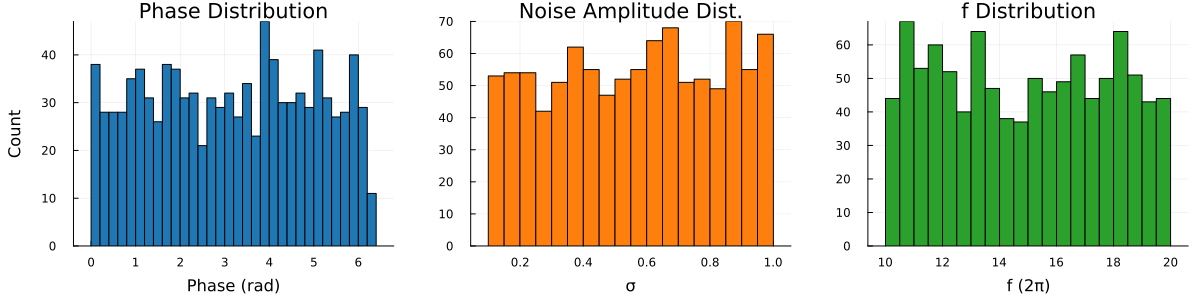

In [427]:
h1 = histogram(phases_train, bins=30, title="Phase Distribution", 
    xlabel="Phase (rad)", ylabel="Count", label="", c=palette(:tab10)[1])
h2 = histogram(noise_amp_train, bins=30, title="Noise Amplitude Dist.", c=palette(:tab10)[2], label="", xlabel="σ")
h3 = histogram(freq_train, bins=30, title="f Distribution", c=palette(:tab10)[3], label="", xlabel="f (2π)")
plot(h1, h2, h3, layout=(1, 3), size=(1200, 300), bottom_margin=7mm, left_margin=7mm)
#savefig("fixed_trend_dists.svg")

Save data 

In [322]:
X_train = train_matrix
y_train = labels_train
X_test = test_matrix
y_test = labels_test;

In [324]:
println(size(X_train))
println(size(y_train))
println(size(X_test))
println(size(y_test))

(1000, 100)
(1000,)
(200, 100)
(200,)


In [326]:
#JLD2.@save "difficult_noisy_sine_fixed_trend.jld2" X_train y_train X_test y_test

# Case 2: Fixed eta, varying m, varying f

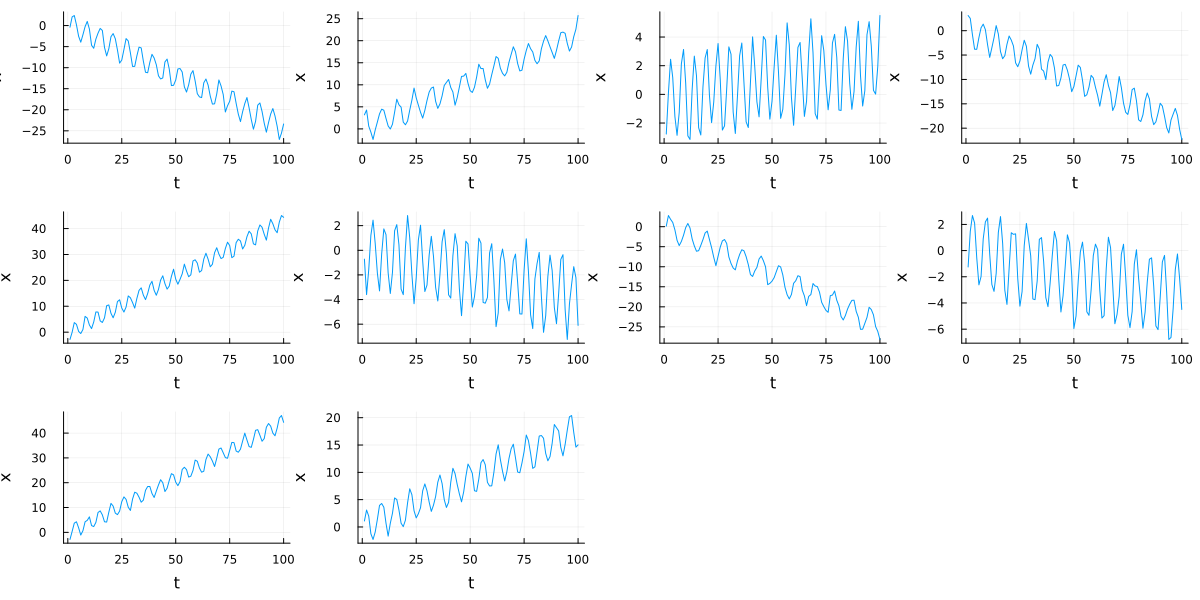

In [428]:
eta = 0.5
samples = 10
ps = []
for i in 1:samples
    noisy_signal_trend, _, _, _, _ = generate_noisy_sine(100, eta, nothing, nothing)
    p = plot(noisy_signal_trend, xlabel="t", ylabel="x", label="")
    push!(ps, p)
end
plot(ps..., size=(1200, 600), bottom_margin=5mm)

In [429]:
num_train_instances = 1000
num_test_instances = 200
eta = 0.5
num_tpoints = 100;
train_matrix = Matrix{Float64}(undef, num_train_instances, num_tpoints)
test_matrix = Matrix{Float64}(undef, num_test_instances, num_tpoints);
labels_train = Int.(zeros(num_train_instances)) # single class problem, all instances are class 0
labels_test = Int.(zeros(num_test_instances))
phases_train = Vector{Float64}(undef, num_train_instances)
phases_test = Vector{Float64}(undef, num_test_instances)
noise_amp_train = Vector{Float64}(undef, num_train_instances)
noise_amp_test = Vector{Float64}(undef, num_test_instances)
freq_train = Vector{Float64}(undef, num_train_instances)
freq_test = Vector{Float64}(undef, num_test_instances)
trend_train = Vector{Float64}(undef, num_train_instances)
trend_test = Vector{Float64}(undef, num_test_instances)
for i in 1:num_train_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, eta, nothing, nothing)
    train_matrix[i, :] = signal
    phases_train[i] = phase
    noise_amp_train[i] = noise
    trend_train[i] = trend
    freq_train[i] = freq
end
for i in 1:num_test_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, eta, nothing, nothing)
    test_matrix[i, :] = signal
    phases_test[i] = phase
    noise_amp_test[i] = noise
    trend_test[i] = trend
    freq_test[i] = freq
end

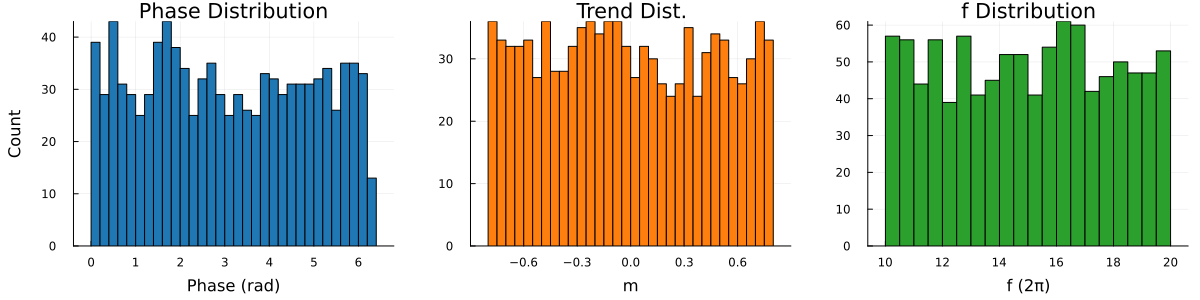

In [430]:
h1 = histogram(phases_train, bins=30, title="Phase Distribution", 
    xlabel="Phase (rad)", ylabel="Count", label="", c=palette(:tab10)[1])
h2 = histogram(trend_train, bins=30, title="Trend Dist.", c=palette(:tab10)[2], label="", xlabel="m")
h3 = histogram(freq_train, bins=30, title="f Distribution", c=palette(:tab10)[3], label="", xlabel="f (2π)")
plot(h1, h2, h3, layout=(1, 3), size=(1200, 300), bottom_margin=7mm, left_margin=7mm)

In [431]:
X_train = train_matrix
y_train = labels_train
X_test = test_matrix
y_test = labels_test;
println(size(X_train))
println(size(y_train))
println(size(X_test))
println(size(y_test))

(1000, 100)
(1000,)
(200, 100)
(200,)


In [432]:
JLD2.@save "difficult_noisy_sine_fixed_eta.jld2" X_train y_train X_test y_test

# Case 3: Fixed Frequency, varying eta, varying m

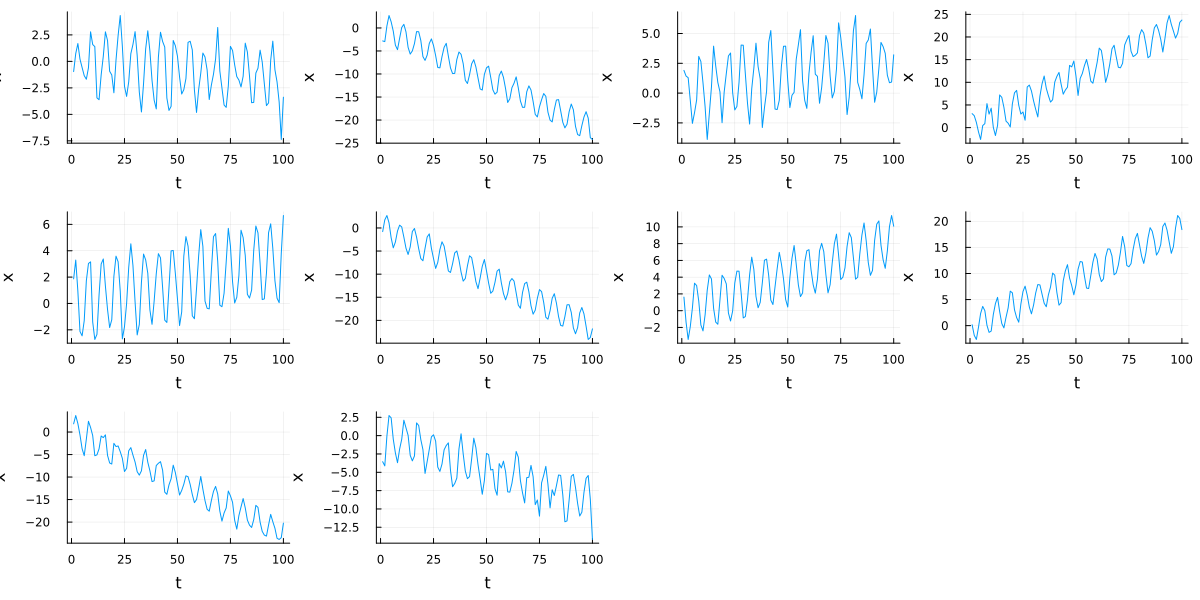

In [434]:
freq = 15.0
samples = 10
ps = []
for i in 1:samples
    noisy_signal_trend, _, _, _, _ = generate_noisy_sine(100, nothing, nothing, freq)
    p = plot(noisy_signal_trend, xlabel="t", ylabel="x", label="")
    push!(ps, p)
end
plot(ps..., size=(1200, 600), bottom_margin=5mm)

In [435]:
num_train_instances = 1000
num_test_instances = 200
freq = 15.0
num_tpoints = 100;
train_matrix = Matrix{Float64}(undef, num_train_instances, num_tpoints)
test_matrix = Matrix{Float64}(undef, num_test_instances, num_tpoints);
labels_train = Int.(zeros(num_train_instances)) # single class problem, all instances are class 0
labels_test = Int.(zeros(num_test_instances))
phases_train = Vector{Float64}(undef, num_train_instances)
phases_test = Vector{Float64}(undef, num_test_instances)
noise_amp_train = Vector{Float64}(undef, num_train_instances)
noise_amp_test = Vector{Float64}(undef, num_test_instances)
freq_train = Vector{Float64}(undef, num_train_instances)
freq_test = Vector{Float64}(undef, num_test_instances)
trend_train = Vector{Float64}(undef, num_train_instances)
trend_test = Vector{Float64}(undef, num_test_instances)
for i in 1:num_train_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, nothing, nothing, freq)
    train_matrix[i, :] = signal
    phases_train[i] = phase
    noise_amp_train[i] = noise
    trend_train[i] = trend
    freq_train[i] = freq
end
for i in 1:num_test_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, nothing, nothing, freq)
    test_matrix[i, :] = signal
    phases_test[i] = phase
    noise_amp_test[i] = noise
    trend_test[i] = trend
    freq_test[i] = freq
end

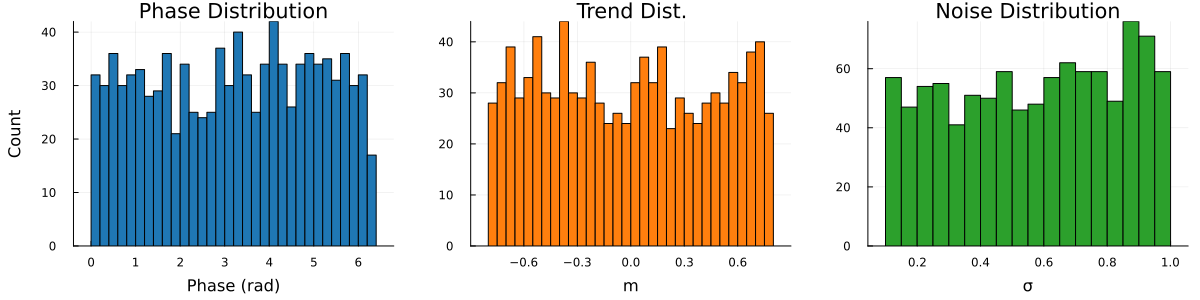

In [436]:
h1 = histogram(phases_train, bins=30, title="Phase Distribution", 
    xlabel="Phase (rad)", ylabel="Count", label="", c=palette(:tab10)[1])
h2 = histogram(trend_train, bins=30, title="Trend Dist.", c=palette(:tab10)[2], label="", xlabel="m")
h3 = histogram(noise_amp_train, bins=30, title="Noise Distribution", c=palette(:tab10)[3], label="", xlabel="σ")
plot(h1, h2, h3, layout=(1, 3), size=(1200, 300), bottom_margin=7mm, left_margin=7mm)

In [437]:
X_train = train_matrix
y_train = labels_train
X_test = test_matrix
y_test = labels_test;
println(size(X_train))
println(size(y_train))
println(size(X_test))
println(size(y_test))

(1000, 100)
(1000,)
(200, 100)
(200,)


In [438]:
#JLD2.@save "difficult_noisy_sine_fixed_freq.jld2" X_train y_train X_test y_test

# Case 4: Noise, Frequency and Trend variable

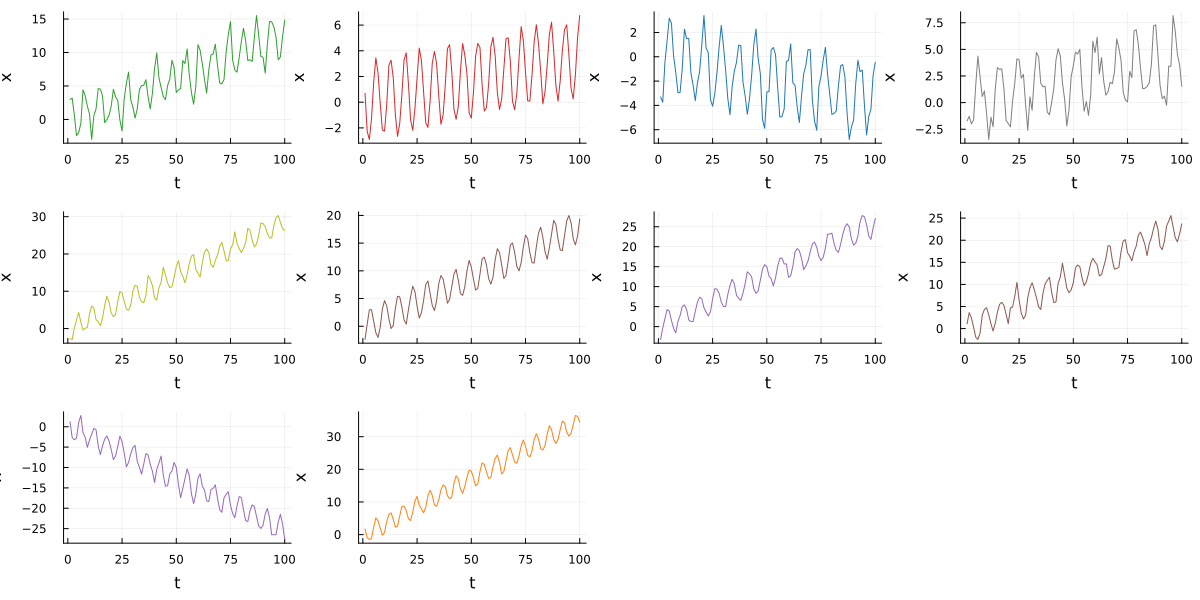

In [439]:
samples = 10
ps = []
for i in 1:samples
    noisy_signal_trend, _, _, _, _ = generate_noisy_sine(100, nothing, nothing, nothing)
    p = plot(noisy_signal_trend, xlabel="t", ylabel="x", label="", c=palette(:tab10)[rand(1:10)])
    push!(ps, p)
end
plot(ps..., size=(1200, 600), bottom_margin=5mm)

In [456]:
num_train_instances = 1000
num_test_instances = 200
num_tpoints = 100;
train_matrix = Matrix{Float64}(undef, num_train_instances, num_tpoints)
test_matrix = Matrix{Float64}(undef, num_test_instances, num_tpoints);
labels_train = Int.(zeros(num_train_instances)) # single class problem, all instances are class 0
labels_test = Int.(zeros(num_test_instances))
phases_train = Vector{Float64}(undef, num_train_instances)
phases_test = Vector{Float64}(undef, num_test_instances)
noise_amp_train = Vector{Float64}(undef, num_train_instances)
noise_amp_test = Vector{Float64}(undef, num_test_instances)
freq_train = Vector{Float64}(undef, num_train_instances)
freq_test = Vector{Float64}(undef, num_test_instances)
trend_train = Vector{Float64}(undef, num_train_instances)
trend_test = Vector{Float64}(undef, num_test_instances)
for i in 1:num_train_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, nothing, nothing, nothing)
    train_matrix[i, :] = signal
    phases_train[i] = phase
    noise_amp_train[i] = noise
    trend_train[i] = trend
    freq_train[i] = freq
end
for i in 1:num_test_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, nothing, nothing, nothing)
    test_matrix[i, :] = signal
    phases_test[i] = phase
    noise_amp_test[i] = noise
    trend_test[i] = trend
    freq_test[i] = freq
end

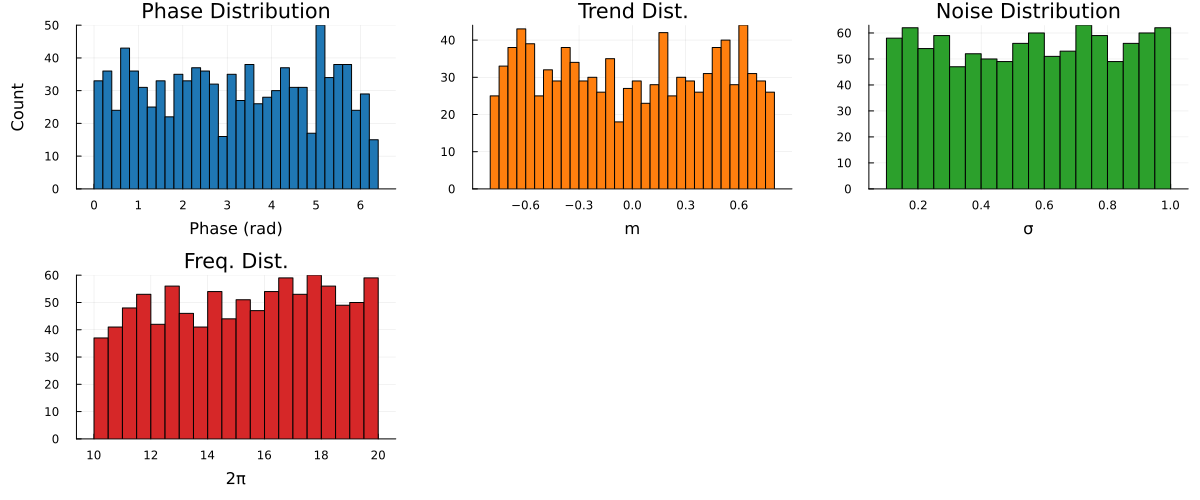

In [457]:
h1 = histogram(phases_train, bins=30, title="Phase Distribution", 
    xlabel="Phase (rad)", ylabel="Count", label="", c=palette(:tab10)[1])
h2 = histogram(trend_train, bins=30, title="Trend Dist.", c=palette(:tab10)[2], label="", xlabel="m")
h3 = histogram(noise_amp_train, bins=30, title="Noise Distribution", c=palette(:tab10)[3], label="", xlabel="σ")
h4 = histogram(freq_train, bins=30, title="Freq. Dist.", c=palette(:tab10)[4], label="", xlabel="2π")
plot(h1, h2, h3, h4, layout=(2, 3), size=(1200, 500), bottom_margin=7mm, left_margin=7mm)

In [458]:
X_train = train_matrix
y_train = labels_train
X_test = test_matrix
y_test = labels_test;
println(size(X_train))
println(size(y_train))
println(size(X_test))
println(size(y_test))

(1000, 100)
(1000,)
(200, 100)
(200,)


In [459]:
#JLD2.@save "difficult_noisy_sine_all_variable.jld2" X_train y_train X_test y_test

# Case 5: Fixed Trend, Fixed Noise, Variable Freq

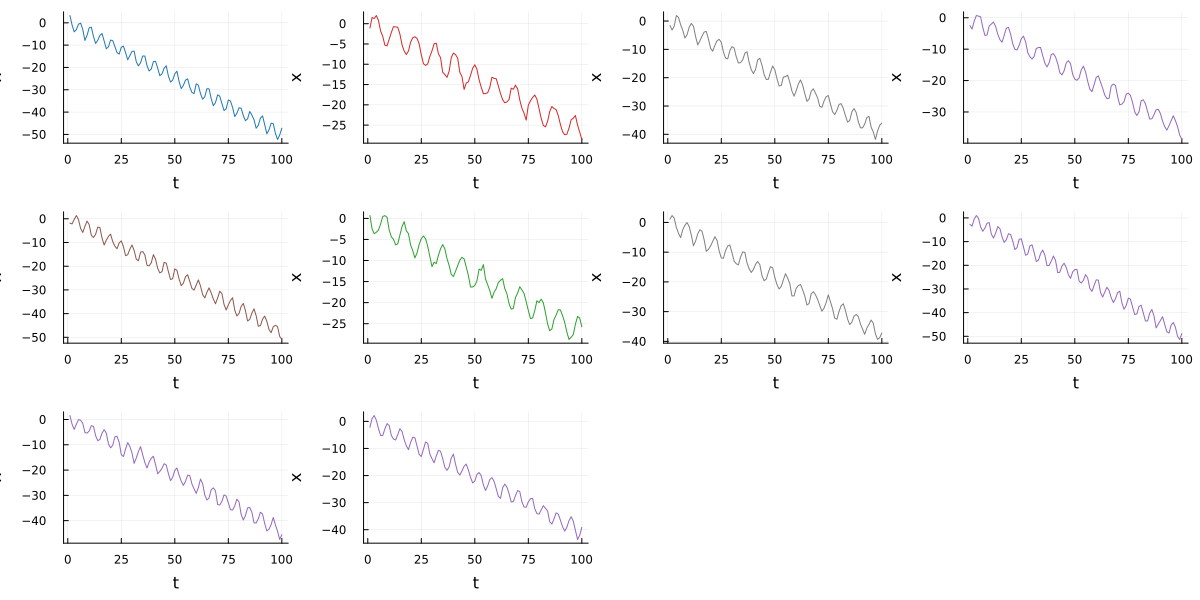

In [476]:
samples = 10
ps = []
trend = -0.8
noise = 0.5
for i in 1:samples
    noisy_signal_trend, _, _, _, _ = generate_noisy_sine(100, noise, trend, nothing)
    p = plot(noisy_signal_trend, xlabel="t", ylabel="x", label="", c=palette(:tab10)[rand(1:10)])
    push!(ps, p)
end
plot(ps..., size=(1200, 600), bottom_margin=5mm)

In [477]:
num_train_instances = 1000
num_test_instances = 200
num_tpoints = 100;
trend = -0.8
noise = 0.5
train_matrix = Matrix{Float64}(undef, num_train_instances, num_tpoints)
test_matrix = Matrix{Float64}(undef, num_test_instances, num_tpoints);
labels_train = Int.(zeros(num_train_instances)) # single class problem, all instances are class 0
labels_test = Int.(zeros(num_test_instances))
phases_train = Vector{Float64}(undef, num_train_instances)
phases_test = Vector{Float64}(undef, num_test_instances)
noise_amp_train = Vector{Float64}(undef, num_train_instances)
noise_amp_test = Vector{Float64}(undef, num_train_instances)
freq_train = Vector{Float64}(undef, num_train_instances)
freq_test = Vector{Float64}(undef, num_train_instances)
trend_train = Vector{Float64}(undef, num_train_instances)
trend_test = Vector{Float64}(undef, num_train_instances)
for i in 1:num_train_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, noise, trend, nothing)
    train_matrix[i, :] = signal
    phases_train[i] = phase
    noise_amp_train[i] = noise
    trend_train[i] = trend
    freq_train[i] = freq
end
for i in 1:num_test_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, noise, trend, nothing)
    test_matrix[i, :] = signal
    phases_test[i] = phase
    noise_amp_test[i] = noise
    trend_test[i] = trend
    freq_test[i] = freq
end

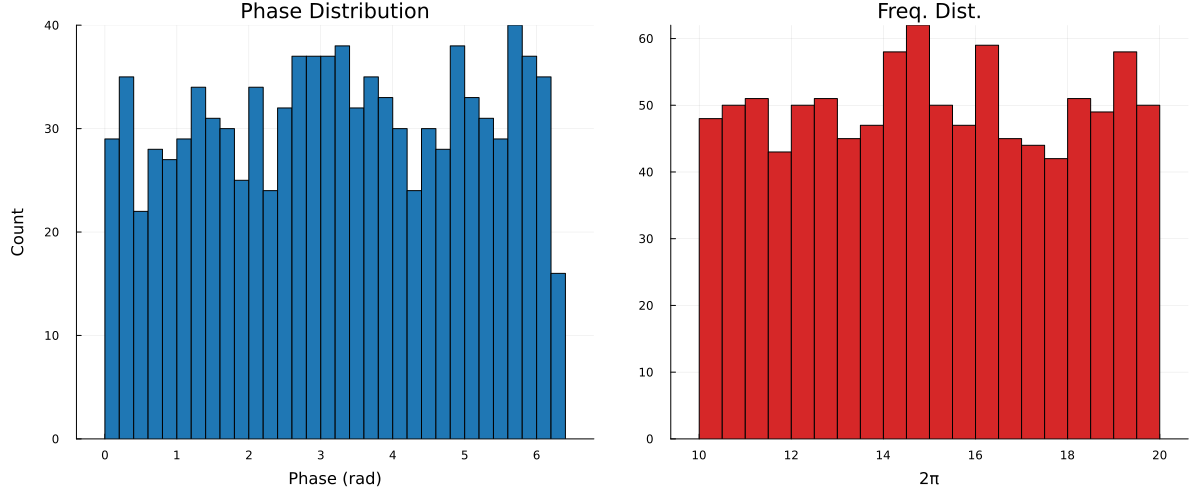

In [478]:
h1 = histogram(phases_train, bins=30, title="Phase Distribution", 
    xlabel="Phase (rad)", ylabel="Count", label="", c=palette(:tab10)[1])
h2 = histogram(freq_train, bins=30, title="Freq. Dist.", c=palette(:tab10)[4], label="", xlabel="2π")
plot(h1, h2, size=(1200, 500), bottom_margin=7mm, left_margin=7mm)

In [479]:
X_train = train_matrix
y_train = labels_train
X_test = test_matrix
y_test = labels_test;
println(size(X_train))
println(size(y_train))
println(size(X_test))
println(size(y_test))

(1000, 100)
(1000,)
(200, 100)
(200,)


In [480]:
#JLD2.@save "difficult_noisy_sine_only_freq_variable.jld2" X_train y_train X_test y_test

# Case 6: Variable Trend, Fixed Noise, Variable Freq

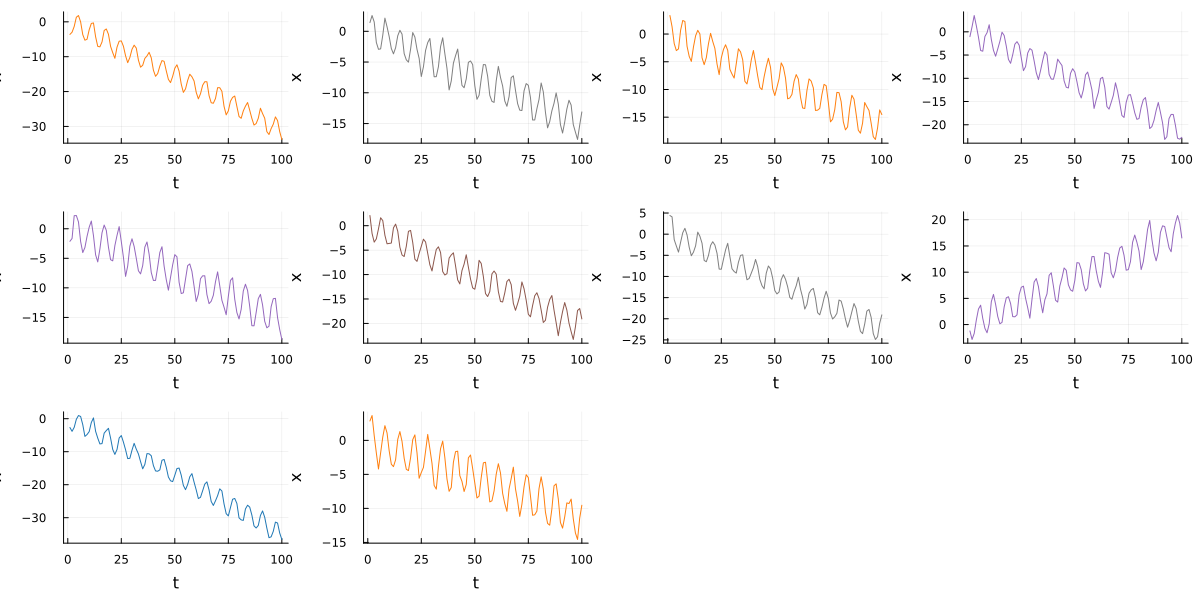

In [481]:
samples = 10
ps = []
noise = 0.5
freq = 15.0
for i in 1:samples
    noisy_signal_trend, _, _, _, _ = generate_noisy_sine(100, noise, nothing, freq)
    p = plot(noisy_signal_trend, xlabel="t", ylabel="x", label="", c=palette(:tab10)[rand(1:10)])
    push!(ps, p)
end
plot(ps..., size=(1200, 600), bottom_margin=5mm)

In [483]:
num_train_instances = 1000
num_test_instances = 200
num_tpoints = 100;
noise = 0.5
freq = 15.0
train_matrix = Matrix{Float64}(undef, num_train_instances, num_tpoints)
test_matrix = Matrix{Float64}(undef, num_test_instances, num_tpoints);
labels_train = Int.(zeros(num_train_instances)) # single class problem, all instances are class 0
labels_test = Int.(zeros(num_test_instances))
phases_train = Vector{Float64}(undef, num_train_instances)
phases_test = Vector{Float64}(undef, num_test_instances)
noise_amp_train = Vector{Float64}(undef, num_train_instances)
noise_amp_test = Vector{Float64}(undef, num_train_instances)
freq_train = Vector{Float64}(undef, num_train_instances)
freq_test = Vector{Float64}(undef, num_train_instances)
trend_train = Vector{Float64}(undef, num_train_instances)
trend_test = Vector{Float64}(undef, num_train_instances)
for i in 1:num_train_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, noise, nothing, freq)
    train_matrix[i, :] = signal
    phases_train[i] = phase
    noise_amp_train[i] = noise
    trend_train[i] = trend
    freq_train[i] = freq
end
for i in 1:num_test_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, noise, nothing, freq)
    test_matrix[i, :] = signal
    phases_test[i] = phase
    noise_amp_test[i] = noise
    trend_test[i] = trend
    freq_test[i] = freq
end

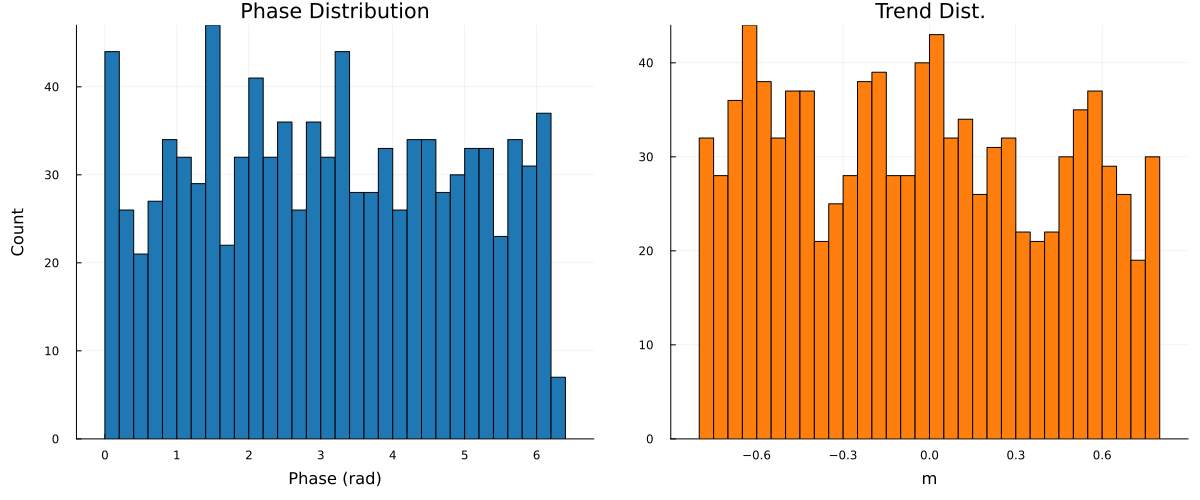

In [484]:
h1 = histogram(phases_train, bins=30, title="Phase Distribution", 
    xlabel="Phase (rad)", ylabel="Count", label="", c=palette(:tab10)[1])
h2 = histogram(trend_train, bins=30, title="Trend Dist.", c=palette(:tab10)[2], label="", xlabel="m")
plot(h1, h2, size=(1200, 500), bottom_margin=7mm, left_margin=7mm)

In [485]:
X_train = train_matrix
y_train = labels_train
X_test = test_matrix
y_test = labels_test;
println(size(X_train))
println(size(y_train))
println(size(X_test))
println(size(y_test))

(1000, 100)
(1000,)
(200, 100)
(200,)


In [486]:
#JLD2.@save "difficult_noisy_sine_only_trend_variable.jld2" X_train y_train X_test y_test

# Case 7: Fixed Trend, Variable Noise, Fixed Freq

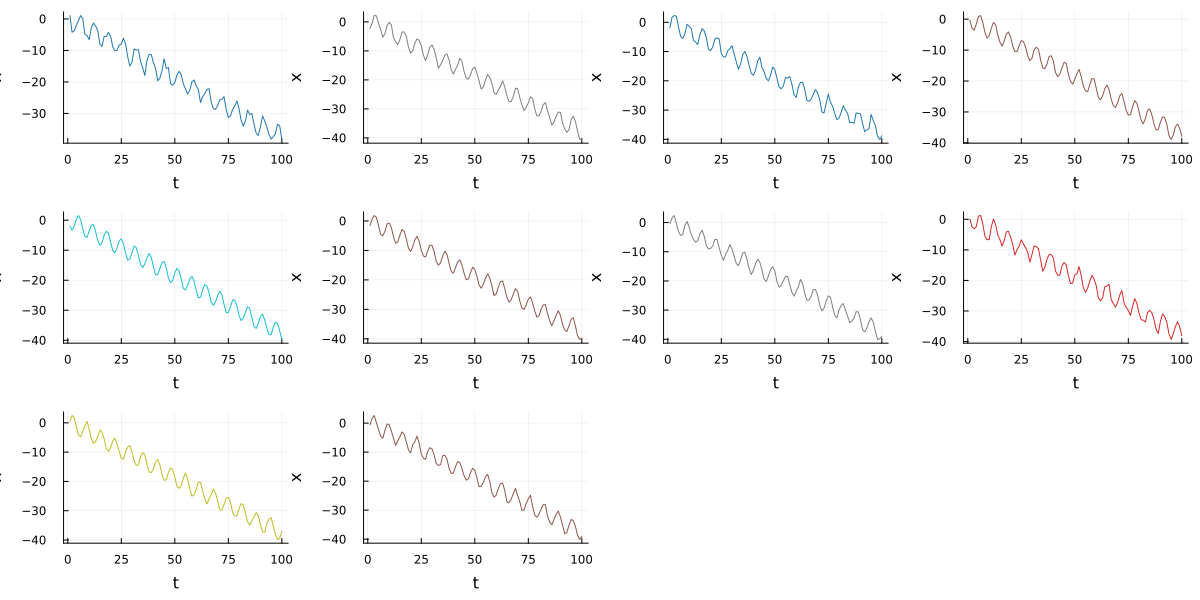

In [487]:
samples = 10
ps = []
trend = -0.8
freq = 15.0
for i in 1:samples
    noisy_signal_trend, _, _, _, _ = generate_noisy_sine(100, nothing, trend, freq)
    p = plot(noisy_signal_trend, xlabel="t", ylabel="x", label="", c=palette(:tab10)[rand(1:10)])
    push!(ps, p)
end
plot(ps..., size=(1200, 600), bottom_margin=5mm)

In [488]:
num_train_instances = 1000
num_test_instances = 200
num_tpoints = 100;
trend = -0.8
freq = 15.0
train_matrix = Matrix{Float64}(undef, num_train_instances, num_tpoints)
test_matrix = Matrix{Float64}(undef, num_test_instances, num_tpoints);
labels_train = Int.(zeros(num_train_instances)) # single class problem, all instances are class 0
labels_test = Int.(zeros(num_test_instances))
phases_train = Vector{Float64}(undef, num_train_instances)
phases_test = Vector{Float64}(undef, num_test_instances)
noise_amp_train = Vector{Float64}(undef, num_train_instances)
noise_amp_test = Vector{Float64}(undef, num_train_instances)
freq_train = Vector{Float64}(undef, num_train_instances)
freq_test = Vector{Float64}(undef, num_train_instances)
trend_train = Vector{Float64}(undef, num_train_instances)
trend_test = Vector{Float64}(undef, num_train_instances)
for i in 1:num_train_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, nothing, trend, freq)
    train_matrix[i, :] = signal
    phases_train[i] = phase
    noise_amp_train[i] = noise
    trend_train[i] = trend
    freq_train[i] = freq
end
for i in 1:num_test_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, nothing, trend, freq)
    test_matrix[i, :] = signal
    phases_test[i] = phase
    noise_amp_test[i] = noise
    trend_test[i] = trend
    freq_test[i] = freq
end

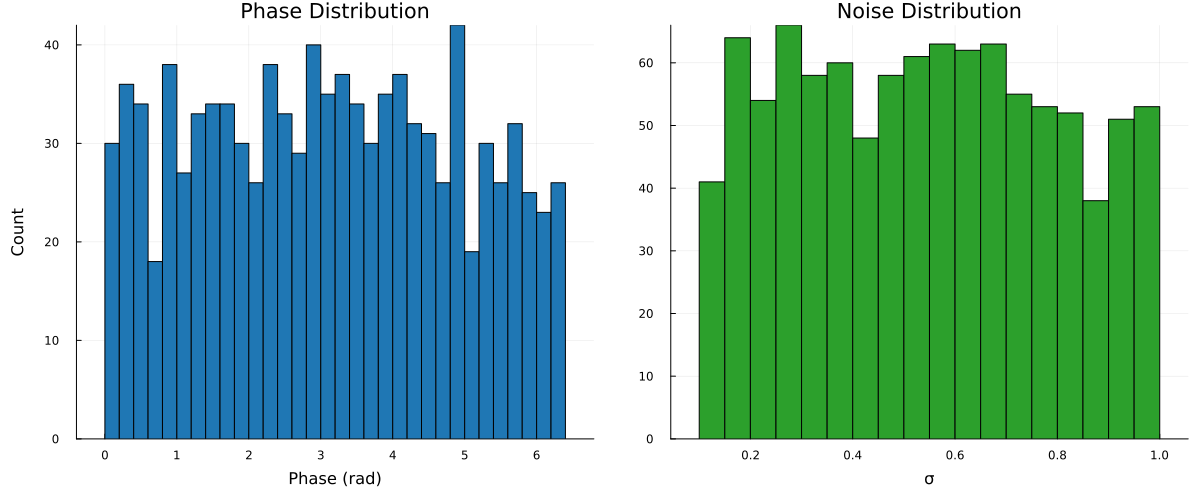

In [489]:
h1 = histogram(phases_train, bins=30, title="Phase Distribution", 
    xlabel="Phase (rad)", ylabel="Count", label="", c=palette(:tab10)[1])
h2 = histogram(noise_amp_train, bins=30, title="Noise Distribution", c=palette(:tab10)[3], label="", xlabel="σ")
plot(h1, h2, size=(1200, 500), bottom_margin=7mm, left_margin=7mm)

In [490]:
X_train = train_matrix
y_train = labels_train
X_test = test_matrix
y_test = labels_test;
println(size(X_train))
println(size(y_train))
println(size(X_test))
println(size(y_test))

(1000, 100)
(1000,)
(200, 100)
(200,)


In [491]:
#JLD2.@save "difficult_noisy_sine_only_eta_variable.jld2" X_train y_train X_test y_test

# Restricted Ranges

In [33]:
function generate_noisy_sine(T::Int, noise_ampltiude::Union{Nothing, Float64}, 
    trend::Union{Nothing, Float64}, freq::Union{Nothing, Float64})
    
    phase = rand(Uniform(0, 2π))
    noise_amp_val = isnothing(noise_ampltiude) ? rand(Uniform(0.1, 0.3)) : noise_ampltiude
    trend_val = isnothing(trend) ? rand(Uniform(0.1, 0.5)) : trend
    freq_val = isnothing(freq) ? rand(Uniform(5, 10)) : freq 
    x = collect(range(0, freq_val*pi, T))
    signal = sin.(2 * x .+ phase)
    noise = rand(Normal(0, noise_amp_val), 100)
    add_trend = trend_val .* x
    noisy_signal_trend = signal .+ noise .+ add_trend

    return noisy_signal_trend, phase, noise_amp_val, trend_val, freq_val
end;

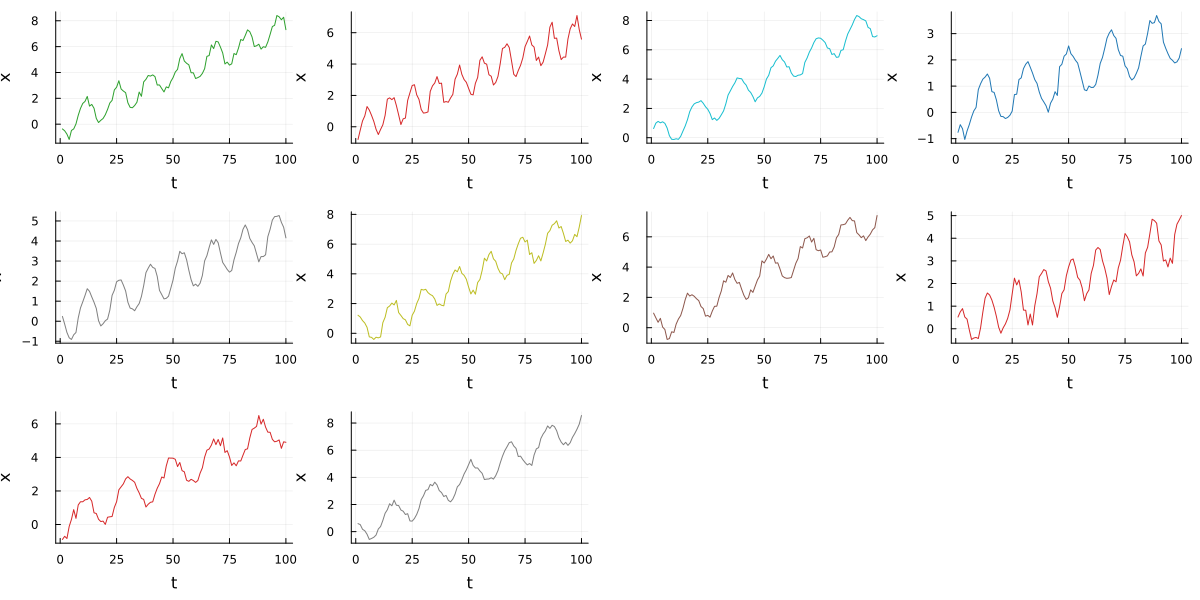

In [34]:
samples = 10
ps = []
for i in 1:samples
    noisy_signal_trend, _, _, _, _ = generate_noisy_sine(100, nothing, nothing, nothing)
    p = plot(noisy_signal_trend, xlabel="t", ylabel="x", label="", c=palette(:tab10)[rand(1:10)])
    push!(ps, p)
end
plot(ps..., size=(1200, 600), bottom_margin=5mm)

In [35]:
num_train_instances = 1000
num_test_instances = 200
num_tpoints = 100;
train_matrix = Matrix{Float64}(undef, num_train_instances, num_tpoints)
test_matrix = Matrix{Float64}(undef, num_test_instances, num_tpoints);
labels_train = Int.(zeros(num_train_instances)) # single class problem, all instances are class 0
labels_test = Int.(zeros(num_test_instances))
phases_train = Vector{Float64}(undef, num_train_instances)
phases_test = Vector{Float64}(undef, num_test_instances)
noise_amp_train = Vector{Float64}(undef, num_train_instances)
noise_amp_test = Vector{Float64}(undef, num_test_instances)
freq_train = Vector{Float64}(undef, num_train_instances)
freq_test = Vector{Float64}(undef, num_test_instances)
trend_train = Vector{Float64}(undef, num_train_instances)
trend_test = Vector{Float64}(undef, num_test_instances)
for i in 1:num_train_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, nothing, nothing, nothing)
    train_matrix[i, :] = signal
    phases_train[i] = phase
    noise_amp_train[i] = noise
    trend_train[i] = trend
    freq_train[i] = freq
end
for i in 1:num_test_instances
    signal, phase, noise, trend, freq = generate_noisy_sine(100, nothing, nothing, nothing)
    test_matrix[i, :] = signal
    phases_test[i] = phase
    noise_amp_test[i] = noise
    trend_test[i] = trend
    freq_test[i] = freq
end

In [43]:
X_train = train_matrix
y_train = labels_train
X_test = test_matrix
y_test = labels_test;
println(size(X_train))
println(size(y_train))
println(size(X_test))
println(size(y_test))

(1000, 100)
(1000,)
(200, 100)
(200,)


In [44]:
JLD2.@save "difficult_noisy_sine_all_variable_restricted.jld2" X_train y_train X_test y_test